In [ ]:
# Przygotuj wszystko tak jak na zajęciach 6 i zadania o fashion mnist. Jedyną różnicą będzie
# sieć:
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

#model = Sequential()
#model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))

# następnie dodając kolejne warstwy konwolucyjne lub warstwy ukryte spróbuj poprawić wynik 
# działania sieci

In [ ]:
# 28 na 28 to rozmiar tych obrazków
# 1 tu oznacza że to jest w skali szarości
# 3 np by oznaczało że  to jest r-g-b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
EPOCHS = 20

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
pd.options.display.max_columns = None
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


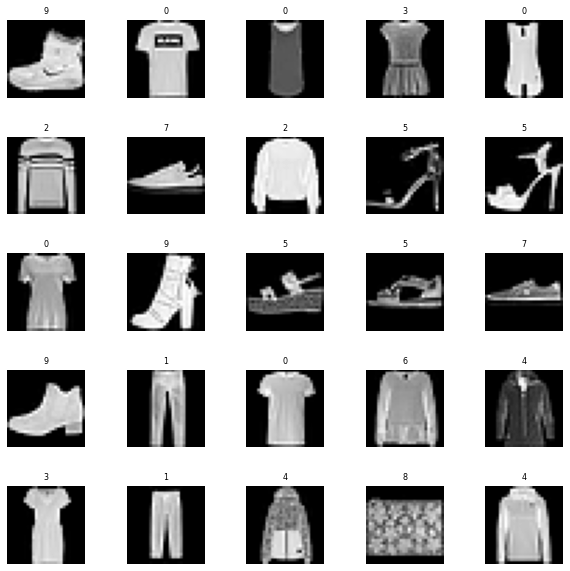

In [5]:
#za pomocą polecenia subplot wyświetl 25 pierwszych elementów zbioru x_train  
#jako title wykresu wyświetl opowiadającą danemu rysunkowi wartość ze zbioru y_train

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]), fontsize = 8)
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [6]:
#zamień wartości w zbiorze testowym i treningowym na zakres od 0 do 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])


Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5671 - accuracy: 0.8044 - val_loss: 0.4480 - val_accuracy: 0.8424
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4029 - accuracy: 0.8587 - val_loss: 0.4028 - val_accuracy: 0.8568
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3689 - accuracy: 0.8714 - val_loss: 0.3903 - val_accuracy: 0.8582
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3500 - accuracy: 0.8773 - val_loss: 0.3675 - val_accuracy: 0.8710
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3371 - accuracy: 0.8822 - val_loss: 0.3653 - val_accuracy: 0.8731
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3275 - accuracy: 0.8855 - val_loss: 0.3607 - val_accuracy: 0.8705
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3198 - accuracy: 0.8879 - val_loss: 0.3528 - val_accuracy:

In [19]:
hist.accuracy

0     0.804417
1     0.858683
2     0.871367
3     0.877250
4     0.882217
5     0.885533
6     0.887933
7     0.890833
8     0.892083
9     0.892967
10    0.894517
11    0.895300
12    0.896833
13    0.897700
14    0.897967
15    0.899467
16    0.898850
17    0.899783
18    0.900233
19    0.900933
Name: accuracy, dtype: float64

In [20]:
hist.val_accuracy

0     0.8424
1     0.8568
2     0.8582
3     0.8710
4     0.8731
5     0.8705
6     0.8759
7     0.8783
8     0.8807
9     0.8782
10    0.8811
11    0.8820
12    0.8808
13    0.8836
14    0.8814
15    0.8838
16    0.8784
17    0.8848
18    0.8824
19    0.8830
Name: val_accuracy, dtype: float64

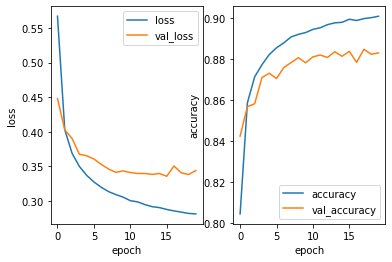

In [11]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [22]:
bambi = Sequential()
bambi.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
bambi.add(MaxPooling2D((2, 2)))
bambi.add(Flatten())
bambi.add(Dense(128, activation='relu'))
bambi.add(Dense(10, activation='softmax'))

bambi.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

bambi.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 676)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               86656     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 87986 (343.70 KB)
Trainable params: 87986 (343.70 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [23]:
bambi_history = bambi.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4592 - accuracy: 0.8407 - val_loss: 0.3950 - val_accuracy: 0.8586
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3252 - accuracy: 0.8835 - val_loss: 0.3393 - val_accuracy: 0.8768
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2872 - accuracy: 0.8954 - val_loss: 0.3360 - val_accuracy: 0.8772
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2609 - accuracy: 0.9047 - val_loss: 0.3084 - val_accuracy: 0.8873
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2378 - accuracy: 0.9132 - val_loss: 0.2845 - val_accuracy: 0.8966
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2204 - accuracy: 0.9184 - val_loss: 0.2798 - val_accuracy: 0.9029
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9248 - val_loss: 0.2744 - val_accuracy

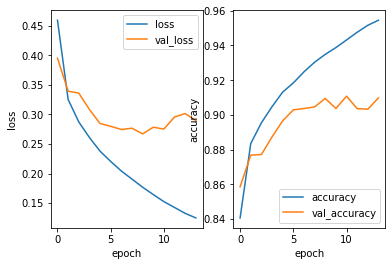

In [27]:
bambi_hist = pd.DataFrame(bambi_history.history)

plt.subplot(1, 2, 1)
plt.plot(bambi_hist.loss, label = "loss")
plt.plot(bambi_hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bambi_hist.accuracy, label = "accuracy")
plt.plot(bambi_hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [28]:
bambi_hist.accuracy

0     0.840650
1     0.883500
2     0.895450
3     0.904750
4     0.913150
5     0.918433
6     0.924817
7     0.930367
8     0.934883
9     0.938783
10    0.943183
11    0.947617
12    0.951650
13    0.954550
Name: accuracy, dtype: float64

In [29]:
bambi_hist.val_accuracy

0     0.8586
1     0.8768
2     0.8772
3     0.8873
4     0.8966
5     0.9029
6     0.9037
7     0.9046
8     0.9095
9     0.9037
10    0.9108
11    0.9036
12    0.9033
13    0.9098
Name: val_accuracy, dtype: float64

In [38]:
halko = Sequential()
halko.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
halko.add(MaxPooling2D((2, 2)))
halko.add(Flatten())
halko.add(Dense(256, activation='relu'))
halko.add(Dense(128, activation='relu'))
halko.add(Dense(10, activation='softmax'))

halko.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

halko.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 676)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               173312    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

In [39]:
halko_history = halko.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4315 - accuracy: 0.8439 - val_loss: 0.3483 - val_accuracy: 0.8745
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3008 - accuracy: 0.8905 - val_loss: 0.2957 - val_accuracy: 0.8909
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2569 - accuracy: 0.9051 - val_loss: 0.2858 - val_accuracy: 0.8974
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2279 - accuracy: 0.9154 - val_loss: 0.2816 - val_accuracy: 0.9007
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2014 - accuracy: 0.9247 - val_loss: 0.2720 - val_accuracy: 0.9018
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1770 - accuracy: 0.9335 - val_loss: 0.2753 - val_accuracy: 0.9052
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1579 - accuracy: 0.9401 - val_loss: 0.2986 - val_ac

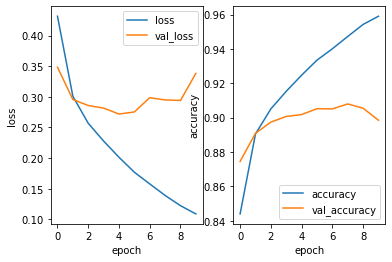

In [40]:
halko_hist = pd.DataFrame(halko_history.history)

plt.subplot(1, 2, 1)
plt.plot(halko_hist.loss, label = "loss")
plt.plot(halko_hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(halko_hist.accuracy, label = "accuracy")
plt.plot(halko_hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [41]:
halko_hist.accuracy

0    0.843933
1    0.890517
2    0.905100
3    0.915350
4    0.924717
5    0.933500
6    0.940100
7    0.947283
8    0.954283
9    0.959067
Name: accuracy, dtype: float64

In [42]:
halko_hist.val_accuracy

0    0.8745
1    0.8909
2    0.8974
3    0.9007
4    0.9018
5    0.9052
6    0.9051
7    0.9080
8    0.9055
9    0.8985
Name: val_accuracy, dtype: float64